# Branchig ratios

## Width decay of $h \to \nu_i N_j$

\begin{equation}
\begin{aligned}
\Gamma\left(h \rightarrow v N \right) &=\frac{Y_N^2}{8 \pi m_h^3} (m_h^2 - m_N^2)^2
\end{aligned}
\end{equation}

In [1]:
from mpmath import *
mp.dps = 80; mp.pretty = True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def Wh_nuN(mh,Mj,Cij):
    g = (2*80.379)/(246)
    mW = 80.379
    if Mj<mh:
        out = (abs(Cij)**2/(8*mp.pi*mh**3))*(mh**2 - Mj**2)**2
    else:
        out = 0.0
    return out

In [4]:
Wh_nuN(125.1,100,0.1)

0.0064876385268286252590368390446904518024266825914312391314374610041188993603118528

In [5]:
LFVHD_data = pd.read_csv('LFVHD.txt',sep='\t')

In [6]:
LFVHD_data.Whl2l3

0     1.686118e-21
1     1.686118e-21
2     1.686118e-21
3     1.686118e-21
4     1.686118e-21
          ...     
95    1.158358e-06
96    2.510377e-06
97    5.438629e-06
98    1.177858e-05
99    2.550031e-05
Name: Whl2l3, Length: 100, dtype: float64

In [7]:
convert_to_array = lambda df,col:np.array(list(map(mpf,df[col])))

In [8]:
def convert_to_frame(df):
    return pd.DataFrame({k:convert_to_array(df,k) for k in df.keys()})

In [9]:
LFVHD_data_mp = convert_to_frame(LFVHD_data)

In [10]:
m6 = convert_to_array(LFVHD_data,'m6')
Whl1l2 = convert_to_array(LFVHD_data,'Whl1l2')
Whl2l1 = convert_to_array(LFVHD_data,'Whl2l1')
Whl1l3 = convert_to_array(LFVHD_data,'Whl1l3')
Whl3l1 = convert_to_array(LFVHD_data,'Whl3l1')
Whl2l3 = convert_to_array(LFVHD_data,'Whl2l3')
Whl3l2 = convert_to_array(LFVHD_data,'Whl3l2')

In [80]:
WidthSM = 0.0032
Whlilj_tot = Whl1l2  + Whl1l3  + Whl2l3  #+ Whl2l1 + Whl3l1 + Whl3l2

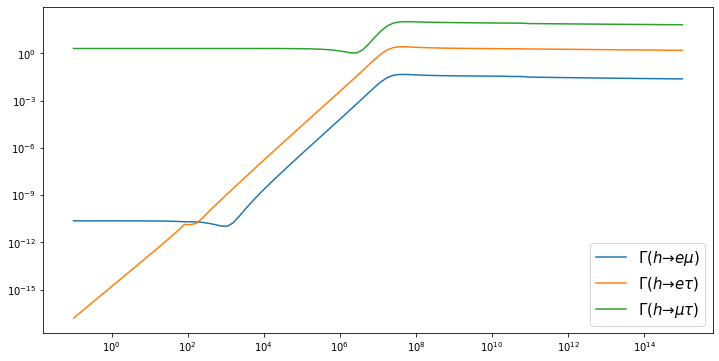

In [81]:
plt.figure(figsize=(12,6))
plt.loglog(m6,(Whl1l2 + Whl2l1)/Whlilj_tot,label=r'$\Gamma(h \to e \mu)$')
plt.loglog(m6,(Whl1l3 + Whl3l1)/Whlilj_tot,label=r'$\Gamma(h \to e \tau)$')
plt.loglog(m6,(Whl2l3 + Whl3l2)/Whlilj_tot,label=r'$\Gamma(h \to \mu \tau)$')
plt.legend(fontsize=15)

In [82]:
from Unu_seesaw import Unu, Rexp,YN, Osc_data, mheavy, mlight,mn1,mn6
from sympy import lambdify

In [83]:
Ynu = lambdify([mn1,mn6],YN.subs(Osc_data).subs(mheavy).subs(mlight),'mpmath')

In [84]:
Ynuij = lambda m6,i,j: Ynu(mpf(1e-12),m6)[i,j]

In [85]:
mn = lambda m6: (m6/3, m6/2, m6)
def WhnuN_sum(m6):
    out = 0
    for i in range(3):
        for j in range(3):
            out += Wh_nuN(125.1,mn(m6)[i],Ynuij(m6,i,j))
    return out

In [86]:
WHnuN_tot = np.array([WhnuN_sum(m) for m in m6])

In [87]:
Wtot = Whlilj_tot + WHnuN_tot + WidthSM

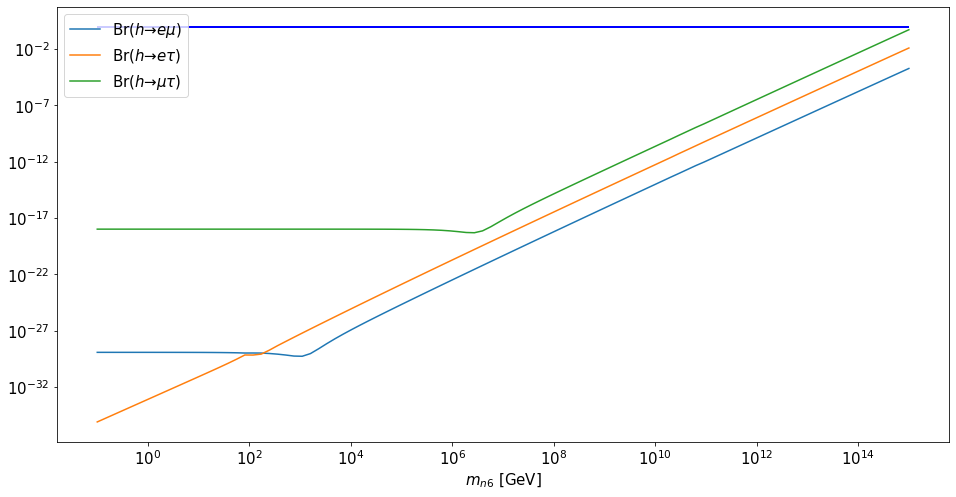

In [89]:
plt.figure(figsize=(16,8))
plt.loglog(m6,(Whl1l2 + Whl2l1 #+ WHnuN_tot
              )/Wtot,label=r'Br$(h \to e \mu)$')
plt.loglog(m6,(Whl1l3 + Whl3l1 #+ WHnuN_tot
              )/Wtot,label=r'Br$(h \to e \tau)$')
plt.loglog(m6,(Whl2l3 + Whl3l2 #+  WHnuN_tot
              )/Wtot,label=r'Br$(h \to \mu \tau)$')
#plt.xlim(1e-1,1e15)
plt.xlabel('$m_{n6}$ [GeV]',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hlines(WidthSM/Wtot,1e-1,1e15,colors='b')
plt.legend(fontsize=15)
#plt.savefig('BR_LFVHD.png')

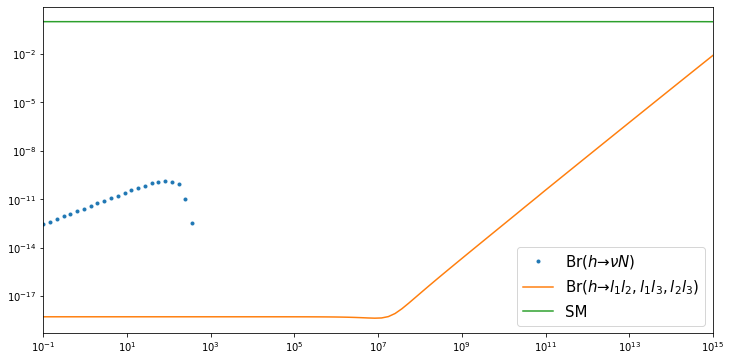

In [70]:
plt.figure(figsize=(12,6))
plt.loglog(m6,WHnuN_tot/Wtot,'.',label=r'Br$(h \to \nu N)$')
plt.loglog(m6,Whlilj_tot/Wtot,label=r'Br$(h \to l_1 l_2,l_1 l_3,l_2 l_3)$')
plt.loglog(m6,(WidthSM)/Wtot,label=r'SM')
plt.xlim(1e-1,1e15)

plt.legend(fontsize=15)#np.abs(WHnuN_tot-Whlilj_tot)

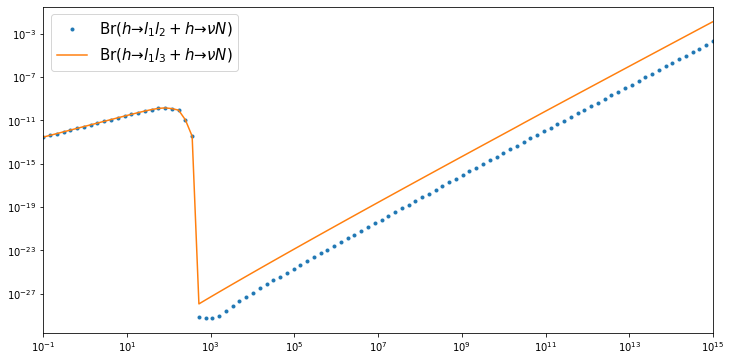

In [63]:
plt.figure(figsize=(12,6))
plt.loglog(m6,(Whl1l2 + Whl2l1 + WHnuN_tot)/Wtot,'.',label=r'Br$(h \to l_1 l_2 + h \to \nu N)$')
plt.loglog(m6,(Whl1l3 + Whl3l1 + WHnuN_tot)/Wtot,label=r'Br$(h \to l_1 l_3 + h \to \nu N)$')
plt.xlim(1e-1,1e15)

plt.legend(fontsize=15)#np.abs(WHnuN_tot-Whlilj_tot)